In [1]:
import sys

In [2]:
sys.path.insert(0, "../")

In [3]:
from hmm import GaussianHMM, distance, plots

In [4]:
import seaborn as sns

In [5]:
sns.set()

In [6]:
pi = [.5, .5]
A1 = [[.6, .4], [.4, .6]]
A2 = [[.4, .6], [.6, .4]]

means = [0, 3]
variances = [1, 1]

m1 = GaussianHMM.GaussianHMM(init_pi=None, init_A=None, init_emissions=None)
m2 = GaussianHMM.GaussianHMM(init_pi=None, init_A=None, init_emissions=None)

m1.pi_ = pi
m1.A_ = A1
m1.means_ = means
m1.variances_ = variances


m2.pi_ = pi
m2.A_ = A2
m2.means_= means
m2.variances_ = variances

In [7]:
distances, symmetric_distances, model_0_logliks, model_1_logliks = distance.explore_model_distances(m1, m2, n=200)

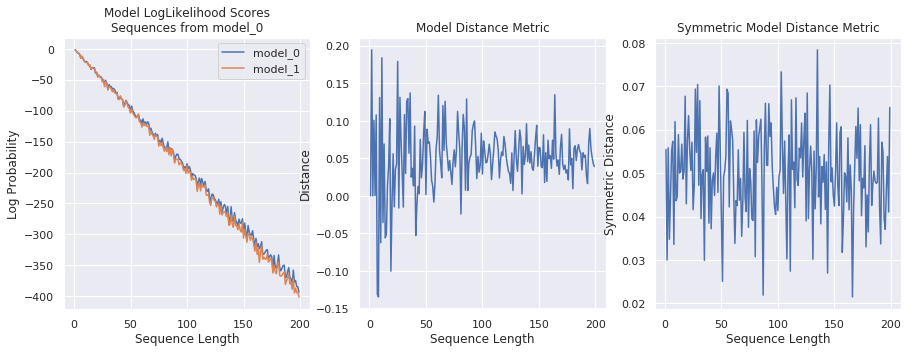

In [8]:
fig = distance.run_model_distance_tests(m1, m2, n=200)

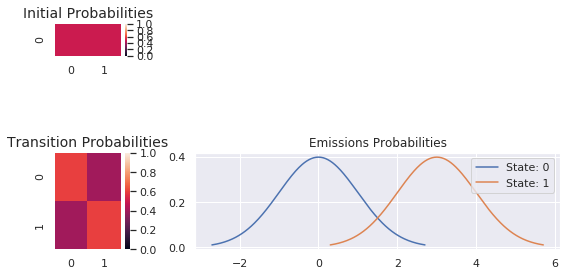

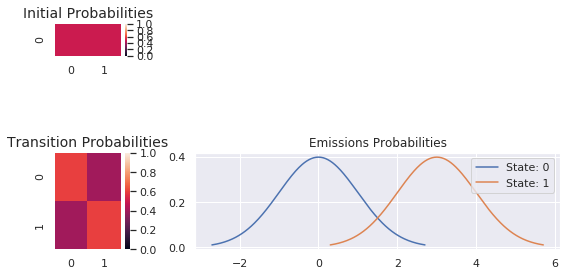

In [9]:

plots.gaussian_hinton_diagram(m1.pi_, m1.A_, m1.means_, m1.variances_, vmin=0, vmax=1)

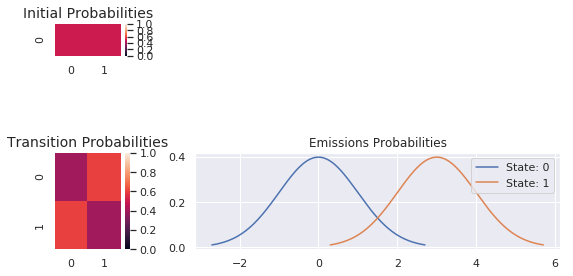

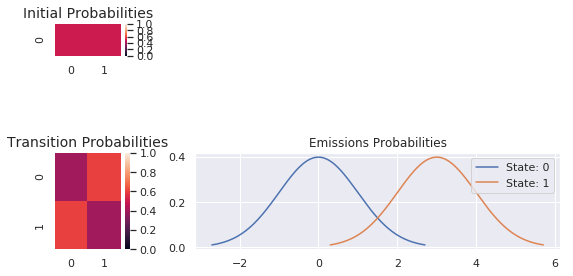

In [10]:

plots.gaussian_hinton_diagram(m2.pi_, m2.A_, m2.means_, m2.variances_, vmin=0, vmax=1)

In [11]:
pi = [.5, .5]
A1 = [[.6, .4], [.4, .6]]

means1 = [0, 3]
variances1 = [1, 1]

means2 = [2, 5]
variances2 = [1, 1]


m1 = GaussianHMM.GaussianHMM(init_pi=None, init_A=None, init_emissions=None)
m2 = GaussianHMM.GaussianHMM(init_pi=None, init_A=None, init_emissions=None)

m1.pi_ = pi
m1.A_ = A1
m1.means_ = means1
m1.variances_ = variances1


m2.pi_ = pi
m2.A_ = A2
m2.means_= means2
m2.variances_ = variances2

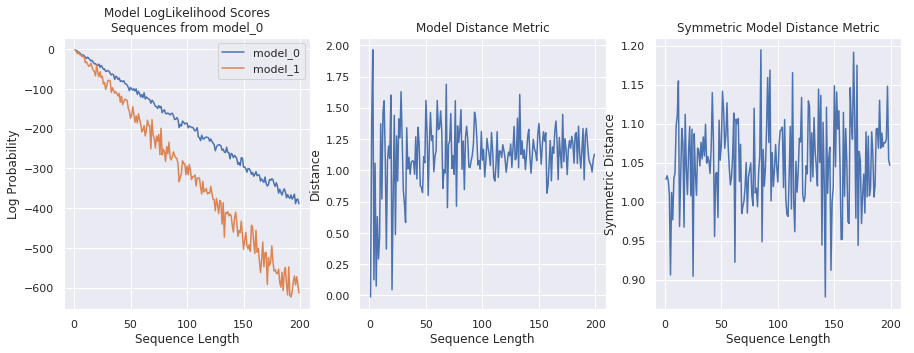

In [12]:
fig = distance.run_model_distance_tests(m1, m2, n=200)

In [13]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gs

In [14]:
def read_benchmark(filename, pattern):
    frame = pd.read_csv(filename)
    frame["TestType"] = frame.configuration.apply(lambda x: re.sub(pattern, "", x))
    frame.set_index("TestType", inplace=True)
    return frame

In [15]:
categorical_frame = read_benchmark("../categorical.benchmark.csv", "Categorical\|")
gaussian_frame = read_benchmark("../gaussian.benchmark.csv", "Gaussian\|")
mvgaussian_frame = read_benchmark("../multivariate_gaussian.benchmark.csv", "MultivariateGaussian\|")
gmm_frame = read_benchmark("../gaussian_mixture.benchmark.csv", "GaussianMixture\|")

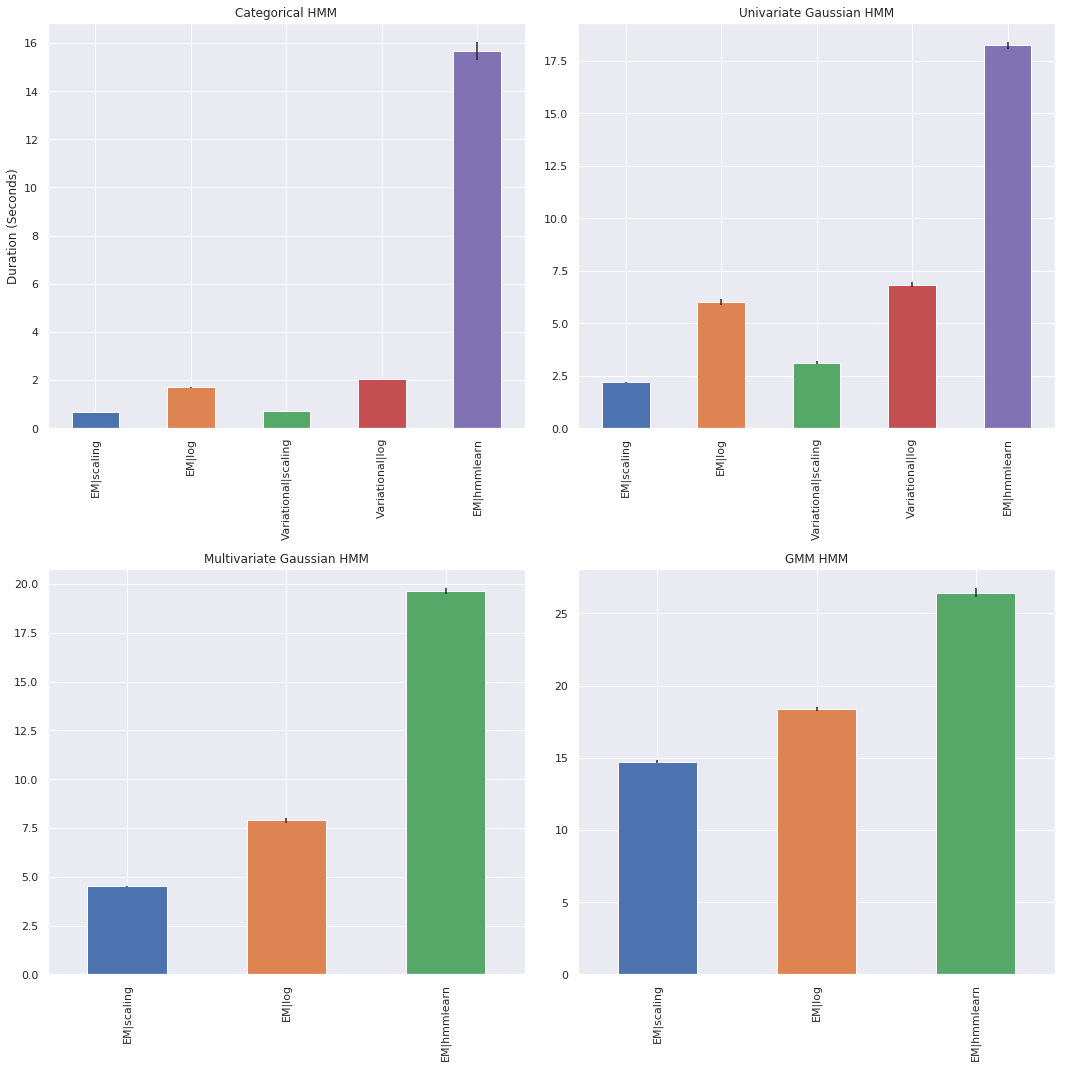

In [16]:
f = plt.figure(figsize=(15, 15))
grid = gs.GridSpec(2, 2)
ax = f.add_subplot(grid[0, 0])
categorical_frame["mean"].plot(kind="bar", yerr=categorical_frame["std"], ax=ax)
ax.set_title("Categorical HMM")
ax.set_ylabel("Duration (Seconds)")
ax.set_xlabel("")

ax = f.add_subplot(grid[0, 1])
gaussian_frame["mean"].plot(kind="bar", yerr=gaussian_frame["std"], ax=ax)
ax.set_title("Univariate Gaussian HMM")
#ax.set_ylabel("Duration (Seconds)")
ax.set_xlabel("")
ax = f.add_subplot(grid[1, 0])
mvgaussian_frame["mean"].plot(kind="bar", yerr=gaussian_frame["std"], ax=ax)
ax.set_title("Multivariate Gaussian HMM")
#ax.set_ylabel("Duration (Seconds)")
ax.set_xlabel("")

ax = f.add_subplot(grid[1, 1])
gmm_frame["mean"].plot(kind="bar", yerr=gmm_frame["std"], ax=ax)
ax.set_title("GMM HMM")
#ax.set_ylabel("Duration (Seconds)")
ax.set_xlabel("")
f.tight_layout()

In [17]:
import re

In [18]:
lines = []
with open("../categorical_in_depth.csv") as fd:
    header = fd.readline()
    keys = ["hmm_type", "hmm_algo", "hmm_impl", "n_states", "mean", "std", "iterations"]
    for line in fd:
        line = line.strip("\n"). split("|")
        items = line[:3]
        items.extend(line[3].split(","))
        
        lines.append(dict(zip(keys, items)))

In [19]:
in_depth = pd.DataFrame.from_records(lines)
in_depth["mean"] = in_depth["mean"].apply(float)
in_depth["std"] = in_depth["std"].apply(float)
in_depth["n_states"] = in_depth["n_states"].apply(int)

In [20]:
in_depth.hmm_impl.unique()

array(['scaling', 'log'], dtype=object)

In [21]:
in_depth.hmm_algo.unique()

array(['EM'], dtype=object)

In [22]:
def plot_mean(impl, algo):
    these = in_depth[(in_depth.hmm_impl == impl) & (in_depth.hmm_algo == algo)].set_index("n_states")
    these["mean"].plot(kind="bar")

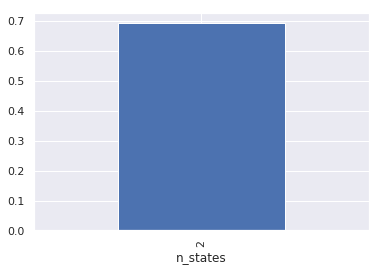

In [23]:
plot_mean("scaling", "EM")

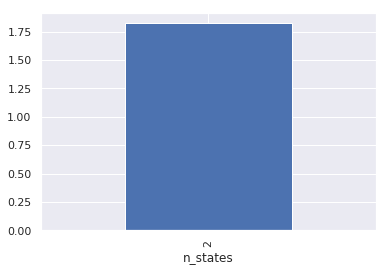

In [24]:
plot_mean("log", "EM")


In [25]:
plot_mean("scaling", "Variational")

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
plot_mean("log", "Variational")


In [ ]:
plot_mean("hmmlearn", "EM")